# 尝试做一个线性回归器

In [158]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import random

In [172]:
class SGDRegression(object):
    def __init__(self, train_size, max_iter):
        self.train_size = int(train_size)
        self.learning_rate = 0.0005
        self.max_iter = max_iter
        self.batch_size = int(train_size - 1)
        self.theta = np.array([1.0, 1.0])
    
    def train(self, x_train, y_train):
        # 初始化
        num_samples = len(x_train[0])
        pred_y = np.zeros(len(x_train[0]))
        loss = np.zeros(self.max_iter)
        tag = 0
        for i in range(self.max_iter):
            # 从x_list中随机选择train_size个样本，返回选中的x_list的元素位置
            batch_idxs = np.random.choice(len(x_train[0]), self.batch_size)
            x_train_batch = np.array([x_train[:, j] for j in batch_idxs]).T
            y_train_batch = np.array([y_train[j] for j in batch_idxs])
            self.cal_step_gradient(x_train_batch, y_train_batch)
            #print('b:{0}, w:{1}'.format(self.theta[1], self.theta[0]))
            # eval_loss()函数是一个评价函数，评价损失函数
            #print('loss is {0}'.format(self.eval_loss(x_train, y_train)))
            loss[i] = self.eval_loss(x_train, y_train)
        print('loss is {0}'.format(self.eval_loss(x_train, y_train)))
        itera = np.array(range(self.max_iter))
        plt.plot(itera, loss)
        plt.show()
    
    def cal_step_gradient(self, x_train_batch, y_train_batch):
        avg_dtheta = np.array([0.0, 0.0])
        for i in range(self.batch_size):
            pred_y = self.hypothesis(x_train_batch[:, i])  # 计算预测值
            dw, db = self.gradient(pred_y, y_train_batch[i], x_train_batch[:, i])  # 计算当前步的梯度
            avg_dtheta[1] += db
            avg_dtheta[0] += dw
        avg_dtheta[1] /= self.batch_size
        avg_dtheta[0] /= self.batch_size
        self.theta[1] -= self.learning_rate * avg_dtheta[1]
        self.theta[0] -= self.learning_rate * avg_dtheta[0]
            
    def hypothesis(self, x_train):
        pred_y = self.theta @ x_train
        return pred_y
    
    # gradient: get dw & db
    # 这里应该是得到损失函数关于各个参数的导数，dJ/dw 和 dJ/db
    def gradient(self, pred_y, gt_y, x):
        diff = pred_y - gt_y   # 这里对应的是损失函数的导数，gt_y = ground true 真实值，已知的
        dw = diff * x[0]          # pred_y 是hypothesis算出来的
        db = diff
        return dw, db
    
    # 评价函数,其实计算的是损失函数
    def eval_loss(self, x_train, y_train):
        avg_loss = 0.0
        avg_loss = np.mean(0.5 * (self.hypothesis(x_train) - y_train) ** 2)
        return avg_loss
    
    
    def pred(self, x_train):
        pred_y = np.zeros(len(x_train))
        for i in range(len(x_train)):
            pred_y[i] = self.hypohesis(x_train[i])
        return pred_y

In [162]:
# 生成样本数据
def gen_sample_data(theta, num_samples):
    x_list = np.array([[i, 1] for i in range(num_samples)]).T
    print('x_list:',x_list)
    y_list = theta @ x_list
    print('y_list:',y_list)
    plt.scatter(x_list[0], y_list)
    plt.show()
    return x_list, y_list

In [163]:
def train_test_split(x_list, y_list, train_size, seed):
    random.seed(seed)    # 设置随机种子来保证实验结果的可重复性。
    x_train = random.sample(tuple(x_list[0]), int(len(x_list[0]) * train_size))  # 从x_list中取75%个不重复的样本当做训练数据集
    y_train = [y_list[list(x_list[0]).index(j)] for j in x_train]
    x_test = [x_list[:, j] for j in range(len(x_list[0])) if x_list[0, j] not in x_train]
    y_test = [y_list[j] for j in range(len(y_list)) if y_list[j] not in y_train]
    x_train = np.array(x_train)
    x_train = x_train[np.newaxis, :]
    one = np.ones(len(x_train[0]))
    one = one[np.newaxis, :]
    x_train = np.append(x_train, one, axis = 0)
    y_train = np.array(y_train)
    x_test = np.array(x_test).T
    y_test = np.array(y_test)
    return x_train, y_train, x_test, y_test

In [179]:
def run():
    # 给定参数
    # 利用Namespace把参数储存起来
    args = Namespace(
        seed = 1234,          # 指定随机种子，目的是为了使每一次生成的随机一致,伪随机数
        num_samples = 100,    # 指定样本数量
        train_size = 0.75,    # 训练数据集的大小
        test_size = 0.25,     # 测试数据集的大下
        num_epochs = 100000,     # 迭代次数
    )
    np.random.seed(args.seed)    # 设置随机种子来保证实验结果的可重复性。
    #theta = np.array([np.random.randint(0, 10) + np.random.random(), np.random.randint(0, 5) + np.random.random()])   # random.random()是随机加了点噪声
    theta = np.array([0.8, 6])
    print('b_ori:', theta[1])
    print('w_ori:', theta[0])
    # 生成数据集
    x_list, y_list= gen_sample_data(theta, args.num_samples)
    # 划分训练集和测试集
    x_train, y_train, x_test, y_test = train_test_split(x_list, y_list, args.train_size, args.seed)
    print('x_train:',x_train)
    print('y_train:',y_train)
    print('x_test:',x_test)
    print('y_test:',y_test)
    lm = SGDRegression(args.train_size * args.num_samples, args.num_epochs)
    lm.train(x_train, y_train)
    print('w:', lm.theta[0])
    print('b:', lm.theta[1])
    print(lm.max_iter)
    print(lm.batch_size)

b_ori: 6.0
w_ori: 0.8
x_list: [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
  48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
  72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
  96 97 98 99]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1]]
y_list: [ 6.   6.8  7.6  8.4  9.2 10.  10.8 11.6 12.4 13.2 14.  14.8 15.6 16.4
 17.2 18.  18.8 19.6 20.4 21.2 22.  22.8 23.6 24.4 25.2 26.  26.8 27.6
 28.4 29.2 30.  30.8 31.6 32.4 33.2 34.  34.8 35.6 36.4 37.2 38.  38.8
 39.6 40.4 41.2 42.  42.8 43.6 44.4 45.2 46.  46.8 47.6 48.4 49.2 50.
 50.8 51.6 52.4 53.2 54.  54.8 55.6 56.4 57.2 58.  58.8 

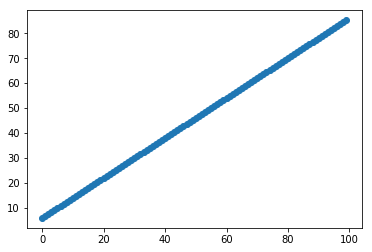

x_train: [[99. 56. 14.  0. 11. 74.  4. 85. 88. 10. 12. 45. 30.  2.  3. 86. 44. 82.
  79. 61. 78. 59. 19. 95. 23. 97.  1. 64. 62. 31.  8. 81. 69. 76. 65.  5.
  34. 52. 35. 93. 41. 77. 87. 54. 22. 17. 15. 68. 89. 29. 33. 42. 73. 32.
  60. 96. 21.  9. 57. 24. 90. 92. 91. 70. 39. 37. 13. 48. 47. 50. 66. 40.
  38. 16. 63.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.]]
y_train: [85.2 50.8 17.2  6.  14.8 65.2  9.2 74.  76.4 14.  15.6 42.  30.   7.6
  8.4 74.8 41.2 71.6 69.2 54.8 68.4 53.2 21.2 82.  24.4 83.6  6.8 57.2
 55.6 30.8 12.4 70.8 61.2 66.8 58.  10.  33.2 47.6 34.  80.4 38.8 67.6
 75.6 49.2 23.6 19.6 18.  60.4 77.2 29.2 32.4 39.6 64.4 31.6 54.  82.8
 22.8 13.2 51.6 25.2 78.  79.6 78.8 62.  37.2 35.6 16.4 44.4 43.6 46.
 58.8

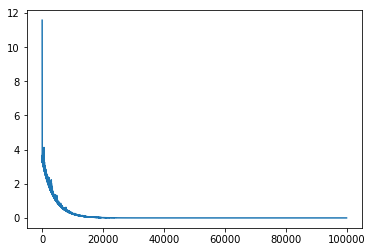

w: 0.8000001153134388
b: 5.999992133304597
100000
74


In [180]:
# lr = 0.0001   max_iter = 10000     
if __name__ == '__main__':
    run()

## 在学习率为0.0005，以及最大迭代步为几万步左右，模型收敛